<a href="https://colab.research.google.com/github/abhi1628/Plant_Disease_Prediction/blob/main/Investigating_Optimization_Methods_and_Loss_Functions_for_Training_Neural_Networks_A_Comparative_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize,  LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical

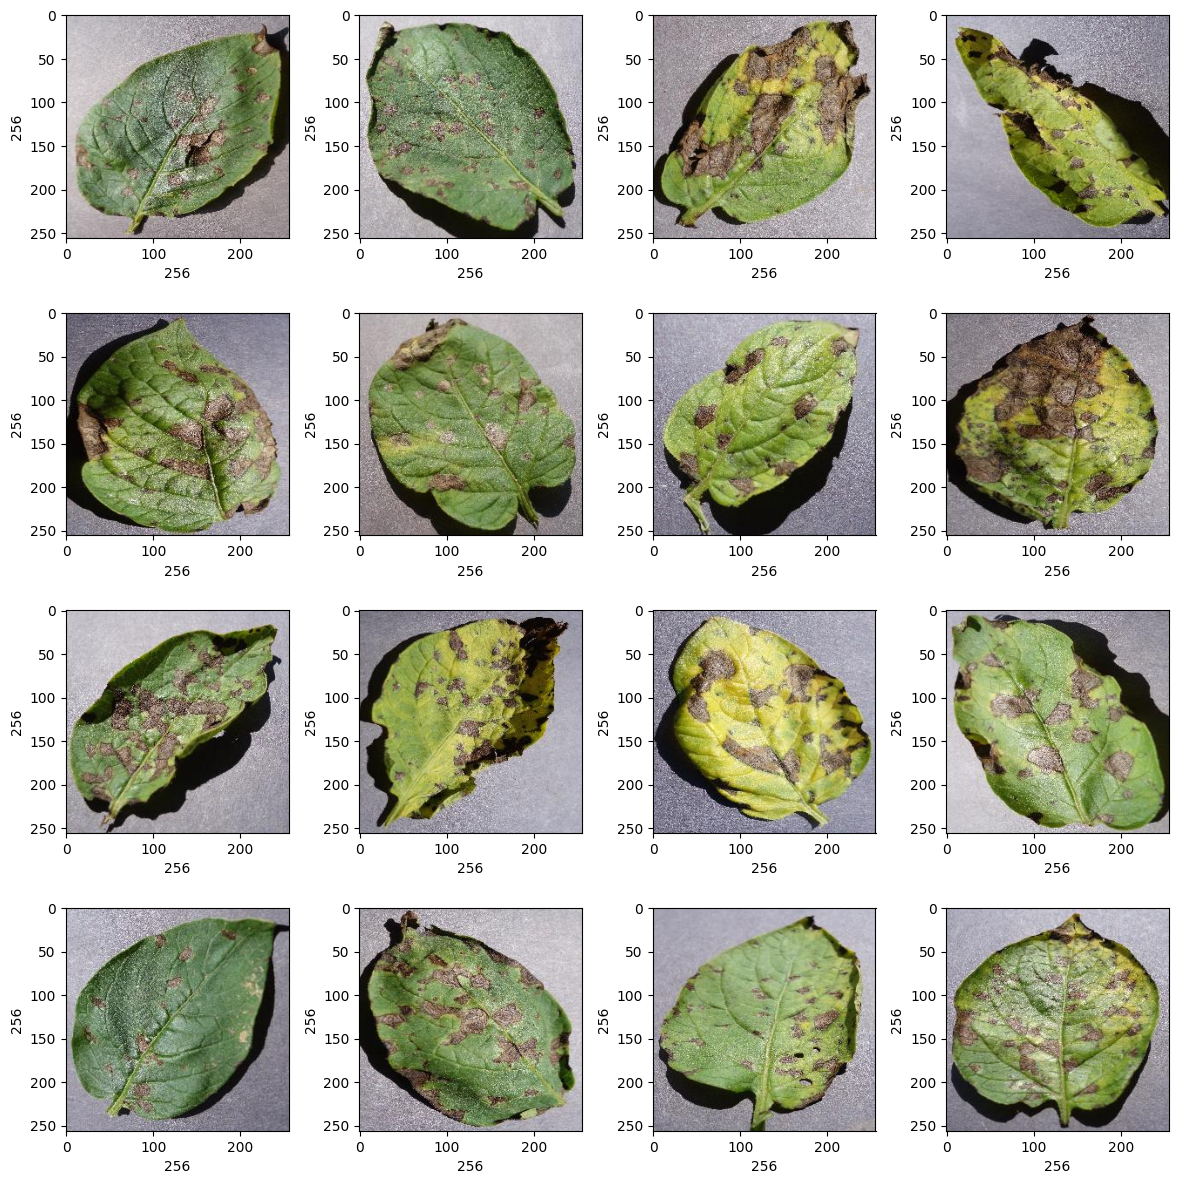

In [2]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = "/content/drive/MyDrive/Plant_images/Potato___Early_blight"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

In [3]:
# Error Handling and Image Resizing Optimization
def convert_image_to_array(image_dir, target_size=(256, 256)):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, target_size)
            #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            return img_to_array(image)
        else :
            print(f"Error: Unable to read image at {image_dir}")
            return None
    except Exception as e:
        print(f"Error: {e} occurred while processing image at {image_dir}")
        return None

In [4]:
dir = "/content/drive/My Drive/Plant_images"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacterial_spot']
binary_labels = [0,1,2]
temp = -1

In [5]:
# Reading and converting image to numpy array
for directory in root_dir:
  plant_image_list = listdir(f"{dir}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_arr = convert_image_to_array(image_path, target_size=(256, 256))
    if image_arr is not None:
        image_list.append(image_arr)
        label_list.append(binary_labels[temp])

In [6]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

0    300
1    300
2    300
dtype: int64

In [7]:
image_list[0].shape

(256, 256, 3)

In [8]:
label_list = np.array(label_list)
label_list.shape

(900,)

In [9]:
from keras.layers import BatchNormalization

# Optimized model
model = Sequential()

model.add(Conv2D(32, (3, 3), padding="same",input_shape=(256,256,3)))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(3))
model.add(Activation("softmax"))

In [10]:
# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 activation (Activation)     (None, 256, 256, 32)      0         
                                                                 
 batch_normalization (Batch  (None, 256, 256, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 85, 85, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 85, 85, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 64)        1


Training model with Adam optimizer and categorical_crossentropy loss...
Epoch 1/10
23/23 [==============================] - 145s 6s/step - loss: 0.1334 - accuracy: 0.9625 - val_loss: 29.1125 - val_accuracy: 0.3278
Epoch 2/10
23/23 [==============================] - 141s 6s/step - loss: 0.0194 - accuracy: 0.9917 - val_loss: 37.3455 - val_accuracy: 0.3278
Epoch 3/10
23/23 [==============================] - 140s 6s/step - loss: 0.0081 - accuracy: 0.9958 - val_loss: 36.1636 - val_accuracy: 0.3278
Epoch 4/10
23/23 [==============================] - 145s 6s/step - loss: 0.0058 - accuracy: 0.9972 - val_loss: 38.2218 - val_accuracy: 0.3278
Epoch 5/10
23/23 [==============================] - 139s 6s/step - loss: 0.0091 - accuracy: 0.9972 - val_loss: 44.3466 - val_accuracy: 0.3278
Epoch 6/10
23/23 [==============================] - 137s 6s/step - loss: 0.0093 - accuracy: 0.9986 - val_loss: 48.5223 - val_accuracy: 0.3278
Epoch 7/10
23/23 [==============================] - 138s 6s/step - loss: 0.

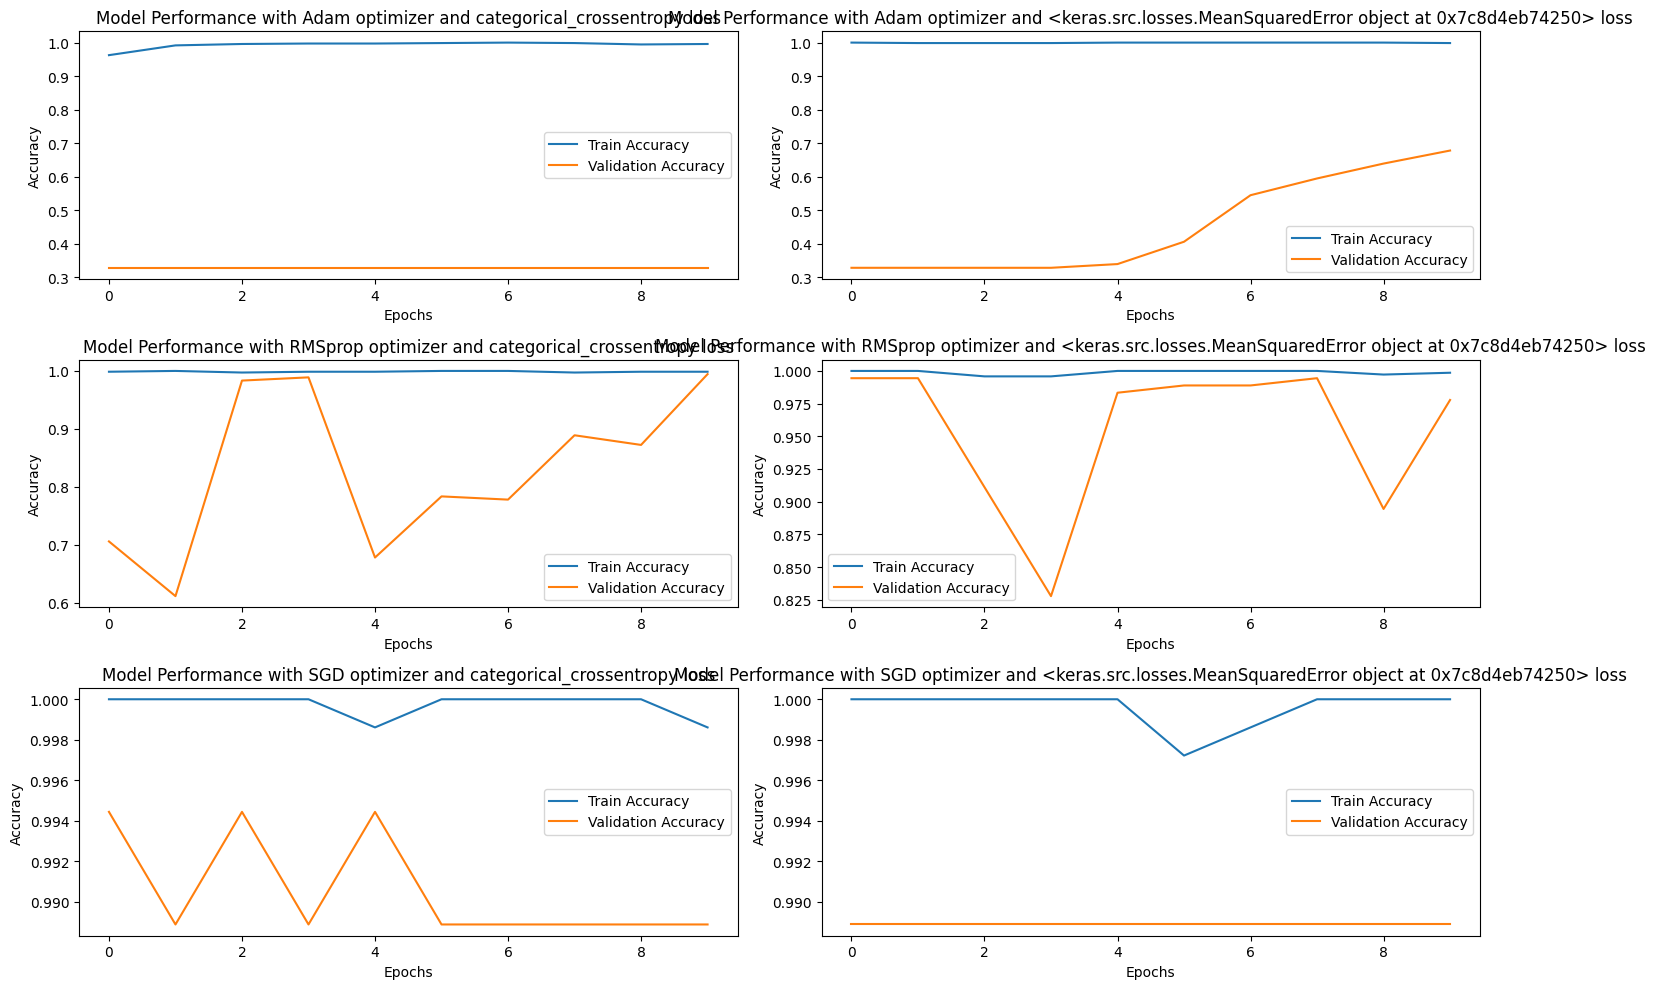

In [11]:
from keras.optimizers import RMSprop, SGD
from keras.losses import MeanSquaredError

# Data preprocessing
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state=10)
x_train = np.array(x_train, dtype=np.float32) / 255.0
x_test = np.array(x_test, dtype=np.float32) / 255.0
x_train = x_train.reshape(-1, 256, 256, 3)
x_test = x_test.reshape(-1, 256, 256, 3)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the list of optimizers and losses
optimizers = [Adam(lr=0.001), RMSprop(lr=0.001), SGD(lr=0.01)]
optimizer_names = ['Adam', 'RMSprop', 'SGD']
losses = ['categorical_crossentropy', MeanSquaredError()]

# Create lists to store results
history_list = []

# Train the model with different optimizers and losses
for optimizer, optimizer_name in zip(optimizers, optimizer_names):
    for loss in losses:
        print(f"\nTraining model with {optimizer_name} optimizer and {loss} loss...")

        # Compile the model
        model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

        # Train the model
        history = model.fit(x_train, y_train, validation_data=(x_test, y_test),
                            epochs=10, batch_size=32, verbose=1)

        # Store history for plotting
        history_list.append((optimizer_name, loss, history))

# Plot the results
plt.figure(figsize=(15, 10))
for i, (optimizer_name, loss, history) in enumerate(history_list, start=1):
    plt.subplot(3, 2, i)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Model Performance with {optimizer_name} optimizer and {loss} loss')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
plt.tight_layout()
plt.show()


In [12]:
import json

# Define file paths
model_file = "/content/drive/My Drive/plant_disease.h5"
json_model_file = "/content/drive/My Drive/plant_model.json"
weights_file = "/content/drive/My Drive/plant_model_weights.h5"

# Save the model in a single file
model.save(model_file)

# Serialize model to JSON
json_model = model.to_json()

# Save the model architecture to a JSON file
with open(json_model_file, 'w') as json_file:
    json_file.write(json_model)

# Save the weights of the model
model.save_weights(weights_file)

# Optimize the size of the saved model files (optional)
# Compressing files, if needed
# ...

# Verify the saved files
if os.path.exists(model_file) and os.path.exists(json_model_file) and os.path.exists(weights_file):
    print("Model saved successfully.")
else:
    print("Error occurred while saving the model.")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully.


In [13]:
print("[INFO] Calculating model accuracy...")
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


[INFO] Calculating model accuracy...
Test Accuracy: 98.89%


In [ ]:
# Plot the training history with loss
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], color='b', label='Validation Accuracy')
plt.plot(history.history['loss'], color='g', label='Train Loss')
plt.plot(history.history['val_loss'], color='orange', label='Validation Loss')
plt.title('Model Training History')
plt.ylabel('Accuracy / Loss')
plt.xlabel('Epochs')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
y_pred = model.predict(x_test)

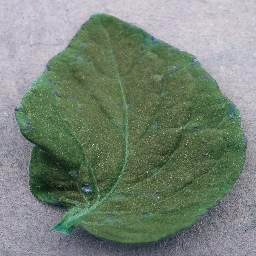

In [16]:
# Plotting image to compare
img = array_to_img(x_test[10])
img

In [17]:
# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",all_labels[np.argmax(y_test[10])])
print("Predicted : ",all_labels[np.argmax(y_pred[10])])

Originally :  Potato-Early_blight
Predicted :  Potato-Early_blight
